# Titanic!

This is simple attempt to solve the [Titanic problem on Kaggle](https://www.kaggle.com/c/titanic) – see if you can improve it!

From the data given we must predict whether a given passenger survives or not, and the evaluation metric is accuracy (% of passangers whos fates we correctly predict)

## Import the packages we'll need

You should probably have pandas standard, but you'll need to install sklearn if you don't have it

You'll also need to install graphviz

In [30]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz

## Load the data

In [31]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
gender = pd.read_csv('../data/titanic/gender_submission.csv')

## Let's explore the data a bit

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Transform the data

### Create a set of  labels

In [35]:
labels = train['Survived']

### Let's pick some features we think are relavent

In [50]:
features = train[['Pclass','Sex']]

#### Turn sex into a numerical value female = 1, male = 0

In [51]:
features['Sex'] = (features['Sex'] == 'female').astype(int)

/anaconda/envs/vis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### We'll split our data into a training set and test set to avoid overfiting our models

We'll do this using an sklearn function which randomly subsets the data, and we'll set the random seed (random_state) to get the same split each time for reproducible results

In [52]:
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Train a decision tree on the data

In [53]:
clf = DecisionTreeClassifier(min_samples_leaf=5,max_depth = 5, random_state=42)
clf.fit(f_train,l_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Test how well we did

In [54]:
predictions = clf.predict(f_test)
accuracy_score(l_test, predictions)

0.7653631284916201

## Let's examine the decision tree we created

if you get an error when displaying the decision tree, you could try installing graphviz with both pip and conda

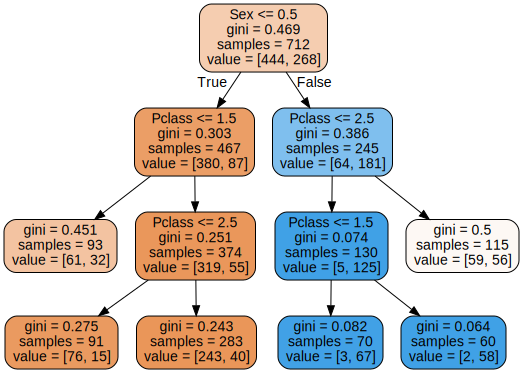

In [55]:
dot_data = tree.export_graphviz(clf, feature_names=features.columns, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data)
graph